In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
from matplotlib import font_manager, rc # rc == run configure(configuration file)
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### 데이터 로드 및 널값 확인

In [376]:
medical = pd.DataFrame(pd.read_csv('./data/medical.csv'))
medical.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


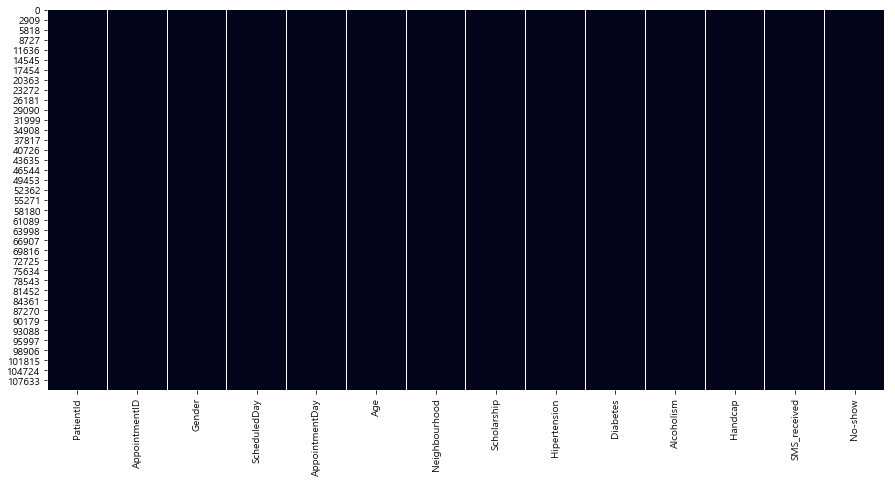

In [377]:
# 널값은 없다

plt.figure(figsize=(15, 7))
sns.heatmap(medical.isnull(), cbar=False)

In [378]:
del medical['PatientId']
del medical['AppointmentID']

### 나이를 처리해보자

In [379]:
medical['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [380]:
medical['AgeGroup'] = 0
medical.loc[medical['Age'] < 18, 'AgeGroup'] = 0
medical.loc[(medical['Age'] >= 18) & (medical['Age'] < 37), 'AgeGroup'] = 1
medical.loc[(medical['Age'] >= 37) & (medical['Age'] < 55), 'AgeGroup'] = 2
medical.loc[medical['Age'] >= 55, 'AgeGroup'] = 3

In [381]:
del medical['Age']

### 성별과 노쇼 숫자로!

In [382]:
medical['Gender'].replace({'F':0,'M':1}, inplace = True)
medical['No-show'].replace({'No':0, 'Yes':1}, inplace = True)

### 지역처리

In [383]:
cities = list(medical['Neighbourhood'])

cities = list(set(cities))

city_to_ids = {}
for index, city in enumerate(cities):
    city_to_ids[city] = index
    
neigh_num = []
for city in list(medical['Neighbourhood']):
    neigh_num.append(city_to_ids[city])
    
medical['neigh_num'] = neigh_num

### 예약 시점과 예약한 날의 컬럼 처리

In [384]:
medical['AppointmentDay'] = pd.to_datetime(medical['AppointmentDay'], format='%Y-%m-%d')
medical['ScheduledDay'] = pd.to_datetime(medical['ScheduledDay'], format='%Y-%m-%d')

In [385]:
medical['Month'] = pd.to_datetime(medical['ScheduledDay'], format='%Y-%m-%d').dt.month

In [386]:
# 7, 8, 9, 10월 데이터가 없다
medical.Month.value_counts()

# 돌려보니 의미가 없어 삭제
del medical['Month']

In [387]:
medical['abs'] = medical['AppointmentDay'] - medical['ScheduledDay']
medical['abs'] = medical['abs'].dt.days
medical.drop( medical[ medical['abs'] < -1 ].index , inplace=True)
medical['abs'] = medical['abs'] + 1

### 핸디캡처리

In [388]:
#medical['Handcap'] = medical['Handcap'].apply(lambda x : 0 if x == 0 else 1)

### 시간

In [389]:
medical['Time'] = pd.to_datetime(medical['ScheduledDay'], format='%Y-%m-%d').dt.hour

In [390]:
medical['TimeGroup'] = 0
medical.loc[medical['Time'] < 9, 'TimeGroup'] = 0
medical.loc[(medical['Time'] >= 9) & (medical['Time'] < 12), 'TimeGroup'] = 1
medical.loc[(medical['Time'] >= 12) & (medical['Time'] < 18), 'TimeGroup'] = 2
medical.loc[medical['Time'] >= 18, 'TimeGroup'] = 3

In [391]:
medical['TimeGroup'].value_counts()

2    40112
0    36139
1    32340
3     1931
Name: TimeGroup, dtype: int64

In [392]:
del medical['AppointmentDay']
del medical['ScheduledDay']

### 시각화

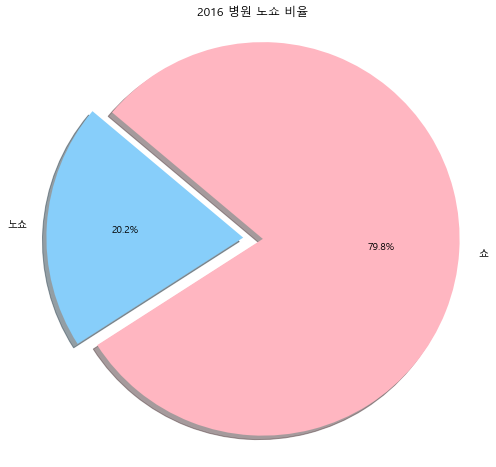

In [393]:
po_ed_num = medical['No-show'].value_counts()

plt.figure(figsize=(8,8))

labels = '노쇼', '쇼'
sizes = [po_ed_num[1], po_ed_num[0]]
colors = ['lightskyblue', 'lightpink']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('2016 병원 노쇼 비율')

plt.axis('equal')
plt.show()

노쇼는 전체 예약의 20%를 차지하며, 꽤 심각하다는 것을 알 수 있다.

그래프로 시각화를 해보자

In [394]:
# fig = plt.figure(figsize=(10, 40))
# ax1 = fig.add_subplot(411)
# ax2 = fig.add_subplot(412)
# ax3 = fig.add_subplot(413)
# ax4 = fig.add_subplot(414)


# size = sns.countplot(x='gill-size', hue='class', data=mushroom, palette='Set3', ax=ax1)
# size.set_title("\n주름 크기별 독버섯 여부\n", fontsize=15)

# atta = sns.countplot(x='gill-attachment', hue='class', data=mushroom, palette='Set3', ax=ax2)
# atta.set_title("\n주름 접착 정도에 따른 독버섯 여부\n", fontsize=15)

# color = sns.countplot(x='gill-color', hue='class', data=mushroom, palette='Set3', ax=ax3)
# color.set_title("\n주름 색깔별 독버섯 여부\n", fontsize=15)

# space = sns.countplot(x='gill-spacing', hue='class', data=mushroom, palette='Set3', ax=ax4)
# space.set_title("\n주름 간격별 독버섯 여부\n", fontsize=15)


### 차원축소

In [395]:
del medical['Time']
del medical['Neighbourhood']
del medical['neigh_num']
#del medical['abs']
del medical['TimeGroup']
del medical['Handcap']
del medical['Alcoholism']

In [396]:
medical_x = medical.copy()
del medical_x['No-show']

medical_x = medical_x.values
medical_y = medical.loc[:,['No-show']].values

In [397]:
from sklearn import decomposition
from sklearn import datasets

model = decomposition.PCA(n_components=0.95)
model.fit(medical_x)

medical_pca_input = model.transform(medical_x)
model.explained_variance_ratio_

np.argmax(np.cumsum(model.explained_variance_ratio_) >= 0.95 ) + 1

1

In [398]:
model.explained_variance_ratio_

array([0.99151699])

In [399]:
# 돌려봤으나 오히려 정확도가 떨어져서 삭제
# medical_x = medical_pca_input

## 머신러닝

In [400]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import ensemble

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category='Logging before flag parsing goes to stderr')

데이터 나누기

In [401]:
x_train, x_test, y_train, y_test = train_test_split(medical_x, medical_y, test_size=0.3)

디시젼트리

In [402]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.7929547305244745


랜덤포레스트

In [403]:
classifier = RandomForestClassifier(n_estimators=50, criterion='entropy')

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.7904514883734958


그래디언트 부스팅

In [404]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0, learning_rate= 0.01)

gbc.fit(x_train, y_train)

print(gbc.score(x_test, y_test))

0.801308924209066


로지스틱 리그레션

In [405]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

y_pred = logistic.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.7985644057061857


**해당 데이터가 주어졌을 때, 머신러닝 중 성능은 그래디언트 부스팅이 제일 좋은 것 같다**

### 머신러닝 ROC 커브

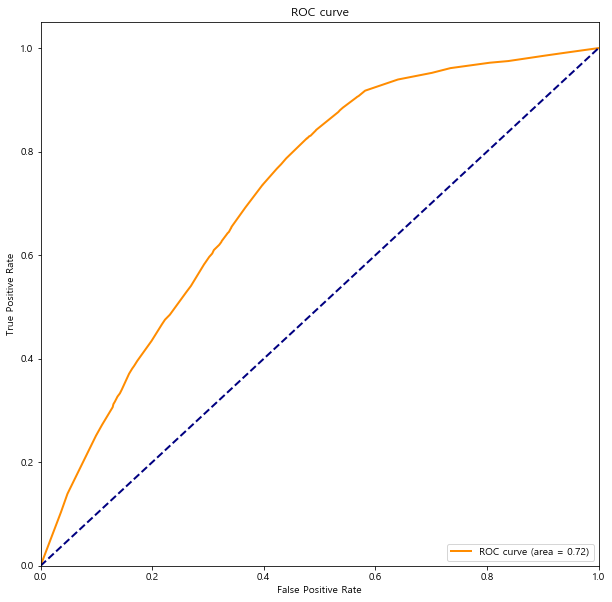

In [406]:
from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error, accuracy_score, roc_curve, auc

pred_test = gbc.predict_proba(x_test) # Predict 'probability'
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

## 딥러닝

In [407]:
medical.head()

,Gender,Scholarship,Hipertension,Diabetes,SMS_received,No-show,AgeGroup,abs
0,0,0,1,0,0,0,3,0
1,1,0,0,0,0,0,3,0
2,0,0,0,0,0,0,3,0
3,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,3,0


In [408]:
import logging, os

logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import tensorflow as tf

tf.contrib.util.constant_value(tf.ones([1]))

array([1.], dtype=float32)

In [421]:
lr = 1e-2
epochs = 1001

In [422]:
inode = medical_x.shape[1]
h1node = 8
h2node = 16
onode = medical_y.shape[1]

In [423]:
X = tf.placeholder(tf.float32, [None, inode])
T = tf.placeholder(tf.float32, [None, onode])

In [424]:
W2 = tf.get_variable("W204", shape = [inode, h1node], initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([h1node]))
Z2 = tf.matmul(X, W2) + b2
A2 = tf.nn.sigmoid(Z2)

W3 = tf.get_variable("W304", shape = [h1node, h2node], initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([h2node]))
Z3 = tf.matmul(A2, W3)+ b3
A3 = tf.nn.sigmoid(Z3)

W4 = tf.get_variable("W404", shape = [h2node, onode], initializer = tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([onode]))
Z4 = tf.matmul(A3, W4) + b4
A4 = tf.sigmoid(Z4)

In [425]:
l1W2 = tf.reduce_mean(tf.abs(W2))
l2W2 = tf.reduce_mean(tf.square(W2))
l1W3 = tf.reduce_mean(tf.abs(W3))
l2W3 = tf.reduce_mean(tf.square(W3))
l1W4 = tf.reduce_mean(tf.abs(W4))
l2W4 = tf.reduce_mean(tf.square(W4))
loss = -tf.reduce_mean(T * tf.log(A4) + (1-T) * tf.log(1-A4)) + 0.01 * (l1W2 + l1W3 + l1W4) + 0.1 * (l2W2 + l2W3 + l2W4)
train = tf.train.AdamOptimizer(lr).minimize(loss)

In [426]:
predicted = tf.cast( A4 > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

In [427]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    start = datetime.now()
    
    for step in range(epochs):
        
        loss_val, _ = sess.run([loss, train], feed_dict = {X: x_train, 
                                                           T: y_train})
    
        if step % 100 == 0:
            test_loss = sess.run(loss, feed_dict={X:x_test,T:y_test})
            print('step = ', step, ", loss = ", loss_val, ", test loss = ", test_loss)
            
    end = datetime.now()
    
    print("\n걸린 시간 : ", end - start)
    acc = sess.run(accuracy, feed_dict={X:x_test,T:y_test})
    print("\n최종 정확도...\n==>", acc * 100, "%")

step =  0 , loss =  1.8033153 , test loss =  1.7059087
step =  100 , loss =  0.50735927 , test loss =  0.5020656
step =  200 , loss =  0.49997005 , test loss =  0.4949828
step =  300 , loss =  0.49712977 , test loss =  0.4921474
step =  400 , loss =  0.49517527 , test loss =  0.49019068
step =  500 , loss =  0.49365664 , test loss =  0.48867214
step =  600 , loss =  0.49238974 , test loss =  0.48740813
step =  700 , loss =  0.49126413 , test loss =  0.4862833
step =  800 , loss =  0.49020657 , test loss =  0.48523143
step =  900 , loss =  0.48929754 , test loss =  0.48433065
step =  1000 , loss =  0.48854056 , test loss =  0.48357973

걸린 시간 :  0:00:25.985795

최종 정확도...
==> 80.13089299201965 %


- normalize 해보았으나 성능이 오히려 떨어짐
- Optimizer 에서 여러가지 알고리즘을 돌려보았으나 Adam이 제일 좋은 성능을 냄